# Linear Regression with Python and sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Enable inline plotting
%matplotlib inline

## Reading in Data

We'll read in a dataset containing some information about housing in Boston.

In [3]:
df = pd.read_csv('College.csv')
print(df.head())

                        College Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

Let's predict graduation rate (Grad.Rate) based on the other variables. So Grad.Rate will be our outcome (y) and the other variables will be our features (X). 

The following commands separate the data into X and y, and also get rid of the College and Private columns for now.

In [4]:
X = df.drop(['College', 'Private', 'Grad.Rate'], axis=1)
print("Here are the features (X):")
print(X.head())
print("Here is the outcome variable (y):")
y = df['Grad.Rate']
print(y)

Here are the features (X):
   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  
0           12    7041  
1           16   10527  
2           30    8735  
3

## Training and Testing Datasets

We will use part of the data for fitting/learning the regression model. We call that the _training_ set.

We use the remainder of the data for evaluating the model predictions. We call that the _test_ set.

In [5]:
X_train = X[0:400]
X_test = X[400:]

y_train = y[0:400]
y_test = y[400:]

## Regression Models in sklearn

We create an instance of the LinearRegression class in sklearn:

In [6]:
lm = linear_model.LinearRegression()

We then fit the model to the training data. 

In [7]:
lm.fit(X_train, y_train)

LinearRegression()

We can check the coefficients/parameters, and the intercept term. 

In [8]:
print(lm.coef_)
print(lm.intercept_)

[ 1.73094725e-03  9.73215572e-04 -2.92979473e-03  6.33511633e-02
  2.35318203e-01 -7.91192944e-04 -1.03474607e-03  6.19720557e-04
  3.21242015e-03 -1.67458024e-03 -8.90950247e-05  5.50300904e-02
 -2.91024587e-02  1.95936993e-02  2.78109769e-01 -6.70829441e-04]
28.98530310521255


Then we can get predictions on the unseen test data. 

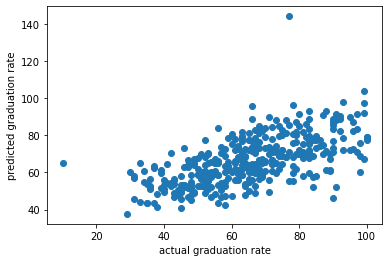

In [9]:
preds = lm.predict(X_test)

plt.figure()
plt.scatter(y_test, preds)
plt.xlabel('actual graduation rate')
plt.ylabel('predicted graduation rate')
plt.show()

# Evaluation

We can calculate the mean squared error (MSE) to see how good our predictions are. 


In [10]:
mse = sum((y_test - preds)**2) / len(preds)
print("MSE: ", mse)

MSE:  180.1713448058067


How does this compare with a simpler model with fewer features?

In [11]:
X_small_train = X_train[['Apps', 'PhD']]
#print(X_small_train)
lm.fit(X_small_train, y_train)
preds_2 = lm.predict(X_test[['Apps', 'PhD']])

mse = sum((y_test - preds_2)**2) / len(preds_2)
print("MSE: ", mse)

MSE:  291.0988032531082


# Lab Assignment

+ Load the Heart data that has been provided to you (heart.csv).
+ Drop the non-numeric variables (ChestPain, Thal, AHD).
 + (We can look at recoding these as numeric variables later.)
+ Choose one of the numeric variables as the outcome variable that you want to predict.
+ Divide the data into features (X) and outcome variable (y).
+ Divide the data into training and test sets, e.g. 200 records in the training set and the remaining 99 in your test set. 
+ Fit two linear regression models:
 + A first model uses a small number of predictors, e.g. one or two. 
 + The second model uses a larger number of predictors.
+ Compare your two models in terms of their MSE on the test set. 
+ Plot the actual value vs. predicted value from your best model on the test set.

In [4]:
df2 = pd.read_csv('heart.csv')

In [7]:
X1 = df2.drop(['ChestPain', 'Thal', 'AHD'], axis=1)
print("Here are the features (X):")
print(X1.head())
print("Here is the outcome variable (y):")
y1 = df2['Chol']
print(y1)

Here are the features (X):
   Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope  Ca
0   63    1     145   233    1        2    150      0      2.3      3   0
1   67    1     160   286    0        2    108      1      1.5      2   3
2   67    1     120   229    0        2    129      1      2.6      2   2
3   37    1     130   250    0        0    187      0      3.5      3   0
4   41    0     130   204    0        2    172      0      1.4      1   0
Here is the outcome variable (y):
0      233
1      286
2      229
3      250
4      204
      ... 
292    241
293    264
294    193
295    131
296    236
Name: Chol, Length: 297, dtype: int64


In [8]:
X1_train = X1[0:150]
X1_test = X1[150:]

y1_train = y1[0:150]
y1_test = y1[150:]

In [9]:
lm1 = linear_model.LinearRegression()

In [10]:
lm1.fit(X1_train, y1_train)

LinearRegression()

In [11]:
print(lm1.coef_)
print(lm1.intercept_)

[ 1.11995975e-15  2.35367281e-14 -3.26520669e-16  1.00000000e+00
 -3.80555119e-16  5.28231615e-17  6.11859811e-16 -3.14129866e-16
  2.89669320e-16  2.71102287e-17  2.00862391e-16]
-5.684341886080802e-14


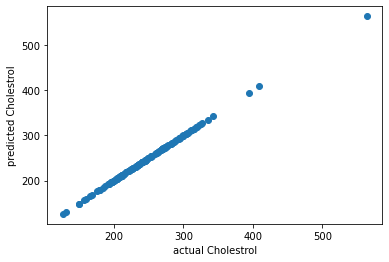

In [13]:
preds1 = lm1.predict(X1_test)

plt.figure()
plt.scatter(y1_test, preds1)
plt.xlabel('actual Cholestrol')
plt.ylabel('predicted Cholestrol')
plt.show()

In [14]:
mse = sum((y1_test - preds1)**2) / len(preds1)
print("MSE: ", mse)

MSE:  9.122022592727106e-28


In [15]:
X1_small_train = X1_train[['Fbs', 'RestECG']]
#print(X_small_train)
lm1.fit(X1_small_train, y1_train)
preds2 = lm1.predict(X1_test[['Fbs', 'RestECG']])

mse = sum((y1_test - preds2)**2) / len(preds2)
print("MSE: ", mse)

MSE:  3022.346791155112


The MSE is very small when we take account of all predictors and hence is the best model. The best model is plotted above.